## ***General Idea:***  From 1985 Ward's Automotive Yearbook

https://archive.ics.uci.edu/ml/datasets/Automobile

***Problem Statment*** : Price Prediction of a Motor Car based on Certain Features


# Proceedure:
<!-- #### <a id='# Data_Expolaration'> Data Expolaration</a> -->

#### [Data Expolaration](#Data_Expolaration)

    0.1 Overall Data Expolaration
    0.2 Data Seperation Based on Types

#### 1. Data Cleaning 
    1.1 Missing Value Treatment
    1.2 Outlier Detection and Capping
    1.3 Correlation Analysis

#### 2. Feature Engineering
    2.1 GeneratingNew Feature
    2.2 Zero Variance Check
    2.3 Univariate Analysis
    2.4 Bi Variate Analysi
    2.5 Feature Selection

#### 3. Model Building
    3.1 Random Forest Classifier
    3.2 DecisionTree Classifier
    3.3 Logistic Regression
    3.4 GradientBoosing Classifier (Bagging)
    3.5 XG Boost Classifier
    3.6 Stacking Classifier

#### 4. Evaluation
    4.1 Metric Evaluation (Accuracy, Precision, Recall, F1-score, ROC Curve) 
    4.2 Model Comparison
  

*******************************************************************

# Data Expolaration 

## Overall Data Expoloration 

In [1]:
 # Importing Required Libararies
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,6)})

# %matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  #Suppressing Warnings

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
# Setting the pandas to view all the avialble column
pd.set_option('display.max_columns',None)

In [3]:
# Reading the data 
data = pd.read_csv("data.data",sep=',',header=None)
# data = pd.read_excel("AirQualityUCI.xlsx")
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [4]:
columns = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_of_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight", "engine_type",
    "num_of_cylinders", "engine_size", "fuel_system", "bore", "stroke",
    "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg",
    "price"
]

In [5]:
data.columns = columns

In [6]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
data = data.loc[data.price != '?']

In [75]:
data.price.dtype

dtype('O')

In [76]:
data.price = data.price.astype(float)

In [77]:
df = data.copy() # Making a data copy to avoid Interfaring with the actual data

#### Data Seperation Based on Types

In [78]:
df_target = df.price
df.drop(columns='price',inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [80]:
df_numerical = df.select_dtypes(include='number')
df_numerical.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [81]:
df_categorical = df.select_dtypes(include='object')
df_categorical.head()

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500


## Data Cleaning

### 1.1 Missing Value Treatment

For Numerical Features

In [82]:
df_numerical.isnull().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
compression_ratio    0
city_mpg             0
highway_mpg          0
dtype: int64

#### For Categorical Feature

Looks Like some features data type is wrong here

In [83]:
df_categorical[['normalized_losses','bore','stroke','horsepower','peak_rpm']].head()

,normalized_losses,bore,stroke,horsepower,peak_rpm
0,?,3.47,2.68,111,5000
1,?,3.47,2.68,111,5000
2,?,2.68,3.47,154,5000
3,164,3.19,3.40,102,5500
4,164,3.19,3.40,115,5500


In [84]:
df_categorical.normalized_losses.value_counts().shape

(52,)

In [85]:
df_categorical.bore.value_counts().shape

(39,)

In [86]:
df_categorical.stroke.value_counts().shape

(37,)

In [87]:
df_categorical.horsepower.value_counts().shape

(59,)

In [88]:
df_categorical.peak_rpm.value_counts().shape

(23,)

As seen all are numerical featues

In [89]:
(df_categorical=='?').sum()

normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
engine_type           0
num_of_cylinders      0
fuel_system           0
bore                  4
stroke                4
horsepower            2
peak_rpm              2
dtype: int64

In [90]:
df_categorical.isna().sum()

normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
engine_type          0
num_of_cylinders     0
fuel_system          0
bore                 0
stroke               0
horsepower           0
peak_rpm             0
dtype: int64

In [91]:
df_categorical.replace(to_replace='?',value='999999',inplace=True)

Let's Change the data Type and fill 999999 with median Value

In [92]:
for col in ['normalized_losses','bore','stroke','horsepower','peak_rpm']:
    df_categorical[col] = df_categorical[col].astype(float)

In [93]:
for col in ['normalized_losses','bore','stroke','horsepower','peak_rpm']:
    df_categorical[col] = df_categorical[col].replace(to_replace=999999,value=np.median(df_categorical[col]))

In [94]:
df_categorical

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
0,128.0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0
1,128.0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111.0,5000.0
2,128.0,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154.0,5000.0
3,164.0,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102.0,5500.0
4,164.0,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114.0,5400.0
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160.0,5300.0
202,95.0,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134.0,5500.0
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106.0,4800.0


In [95]:
df_numerical = pd.concat([df_numerical,df_categorical[['normalized_losses','bore','stroke','horsepower','peak_rpm']]],axis=1)

In [96]:
df_categorical.drop(columns=['normalized_losses','bore','stroke','horsepower','peak_rpm'],inplace=True)

### 1.1 Outlier Detection and Capping

For Numerical Features

In [97]:
df_numerical.describe([0.01,0.1,0.95,0.99])

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,123.104478,3.330299,3.257562,103.313433,5118.407960
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,32.081054,0.268088,0.316082,37.374942,478.183493
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,65.000000,2.540000,2.070000,48.000000,4150.000000
1%,-2.000000,88.400000,144.600000,62.500000,48.800000,1819.000000,70.000000,7.000000,14.000000,17.000000,65.000000,2.910000,2.190000,52.000000,4150.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1951.000000,91.000000,8.000000,17.000000,23.000000,85.000000,2.970000,2.870000,68.000000,4500.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,128.000000,3.310000,3.290000,95.000000,5200.000000
95%,3.000000,110.000000,197.000000,70.300000,57.500000,3505.000000,194.000000,21.900000,37.000000,42.000000,186.000000,3.780000,3.640000,176.000000,6000.000000
99%,3.000000,115.600000,202.600000,71.700000,59.100000,3950.000000,304.000000,23.000000,45.000000,50.000000,197.000000,3.800000,3.900000,207.000000,6000.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,256.000000,3.940000,4.170000,262.000000,6600.000000


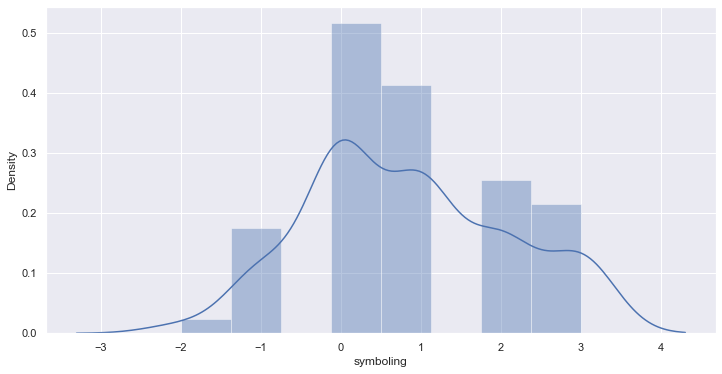

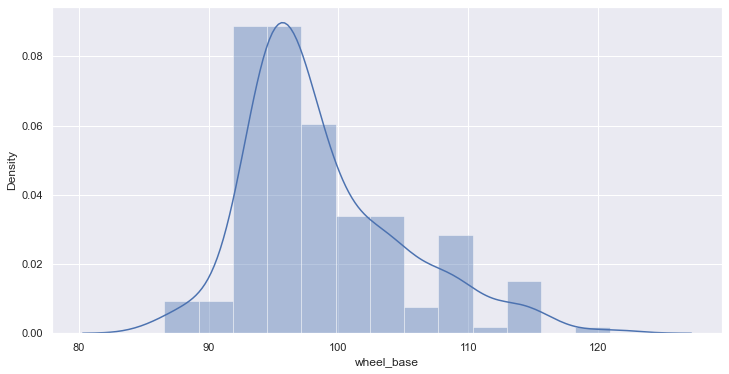

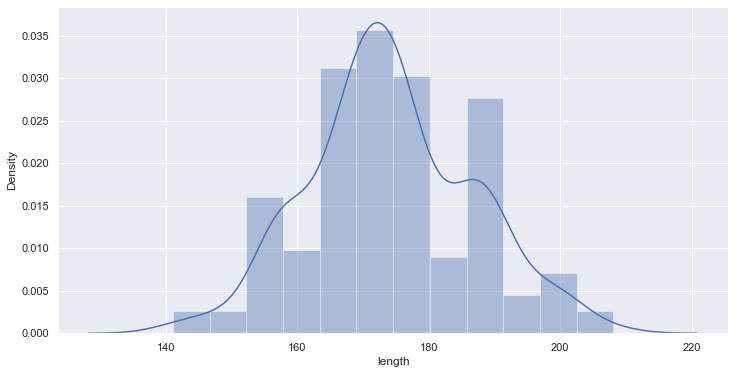

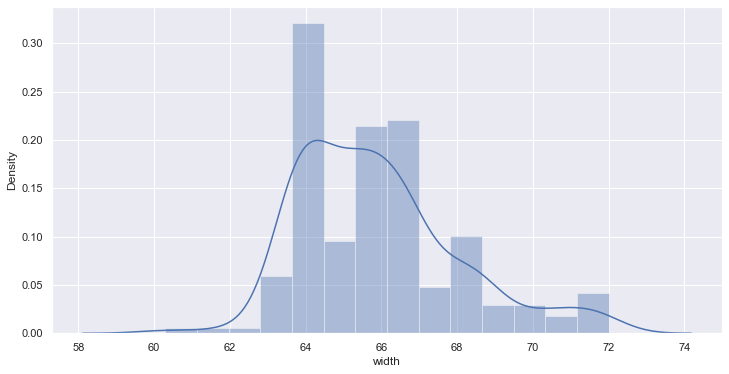

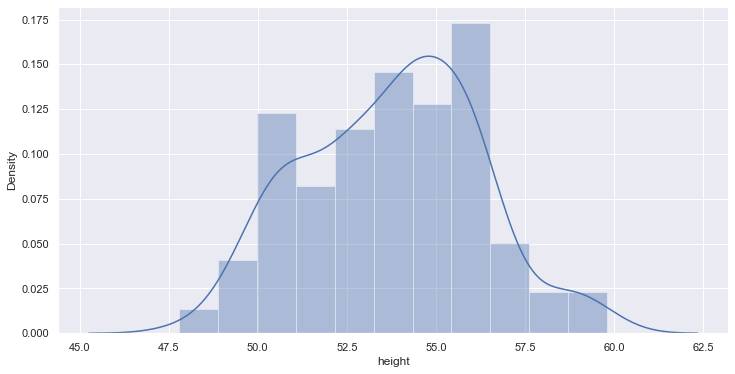

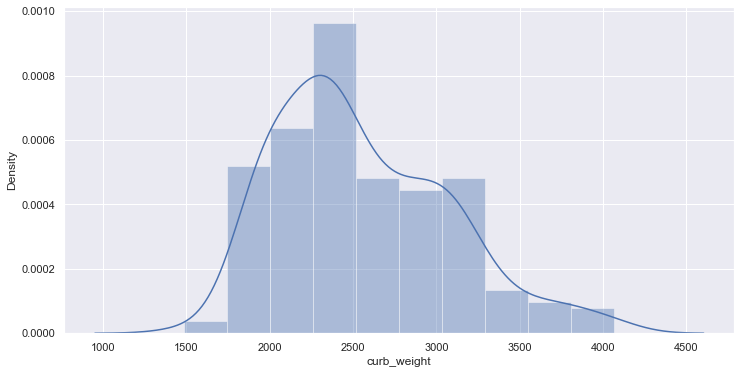

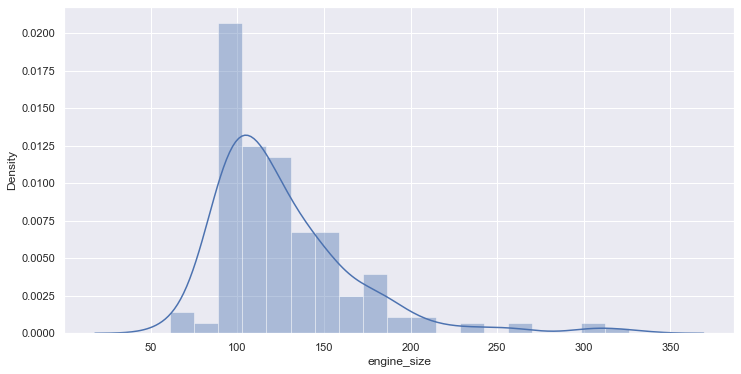

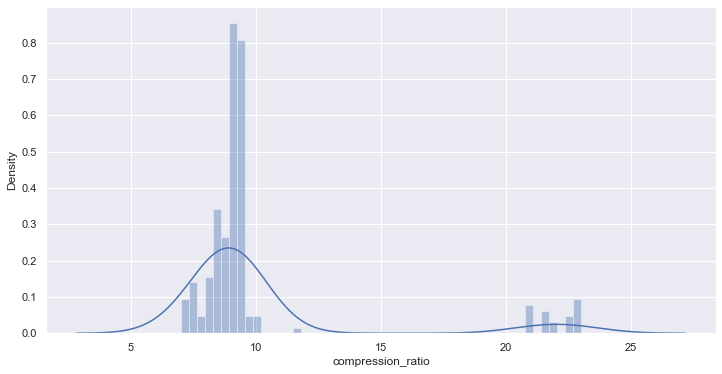

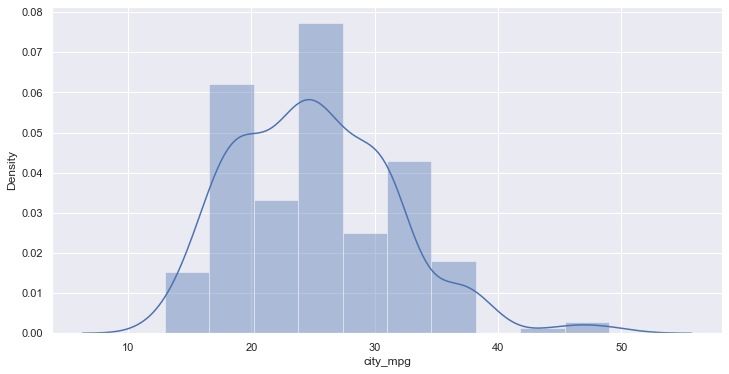

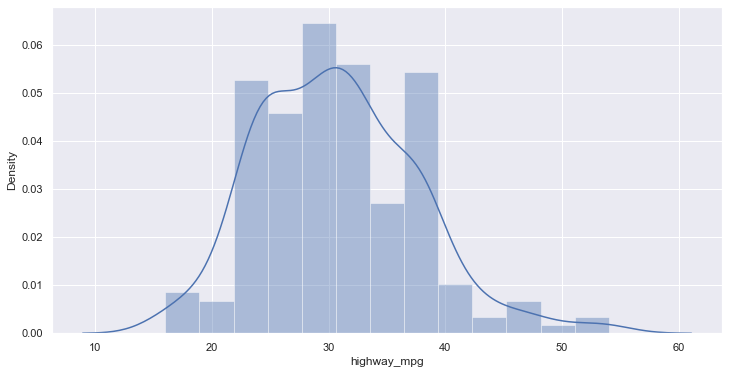

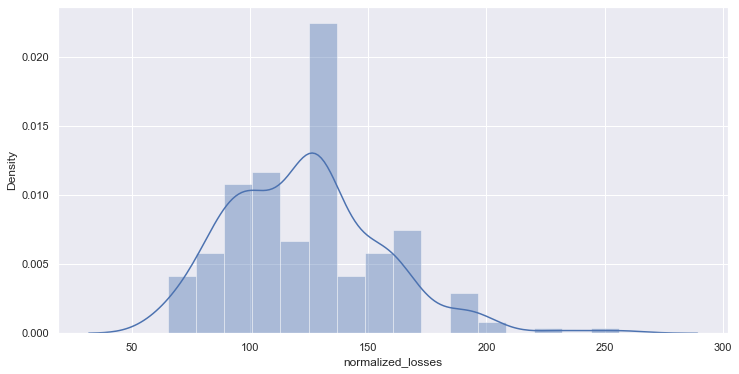

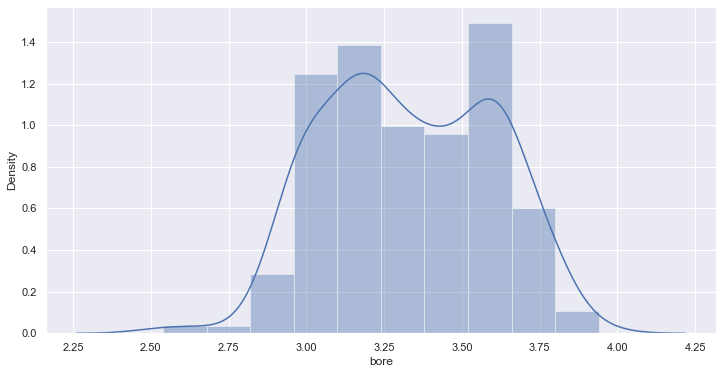

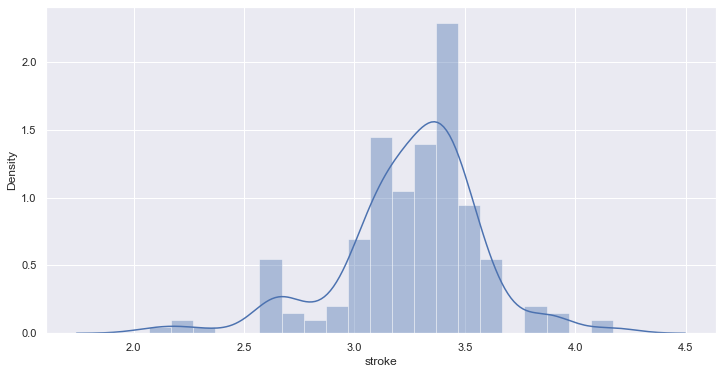

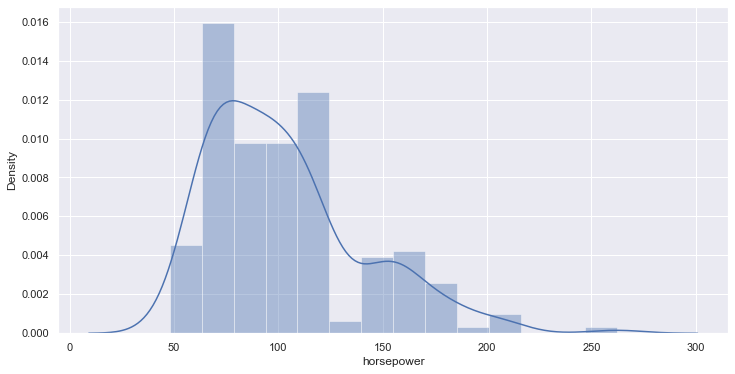

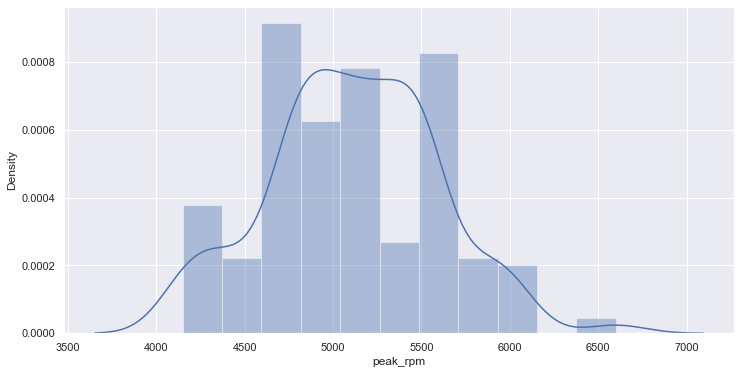

In [98]:
# sns.distplot(df_numerical.wheel_base)

for col in (df_numerical.columns):
    plt.figure()
    sns.distplot(df_numerical[col])
#     sns.barplot(x=col, y="y",data=df_categorical_merged, estimator=np.mean )
plt.show()

In [99]:
def outlayer_capping(data=None,numerical_columns=None,mode='6sigmaa',multiplier=3,inplace=False):
    if data is None or numerical_columns is None:
        raise NotImplemented("No DataFrame passed or No Numerical Columns provided")
        return
    if inplace:
        df = data
    else:
        df = data.copy()
    for column in numerical_columns:
        stat = df[column].describe()
        # mask = breast_cancer['radius_mean'].between(stat['mean']-2*stat['std'],stat['mean']+2*stat['std'],inclusive='both')
        # IQR = stat['75%']-stat['25%']
        # value = stat['75%'] + 1.5*IQR
        if mode != '6sigma':
            df[column]=df[column].clip(lower=df[column].quantile(0.01))
            df[column]=df[column].clip(upper=df[column].quantile(0.99))
        else:
            mask  = (df[column]).le(stat['mean']-multiplier*stat['std'])
            (df[column])[mask] = stat['min']

            mask  = (df[column]).ge(stat['mean']+multiplier*stat['std'])
            (df[column])[mask] = stat['75%']
    if inplace==False:
        return df

In [100]:
outlayer_capping(data=df_numerical,numerical_columns=df_numerical.columns,inplace=True)

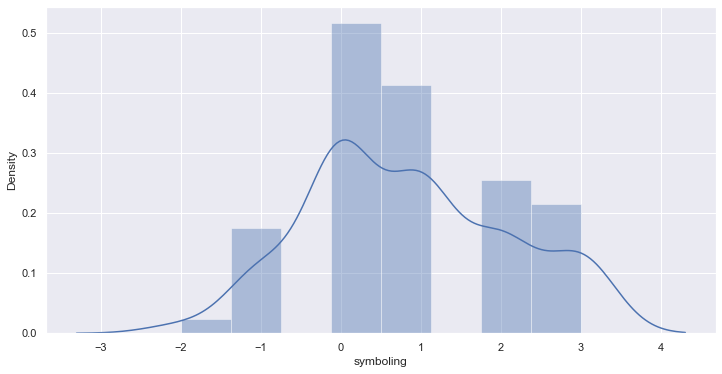

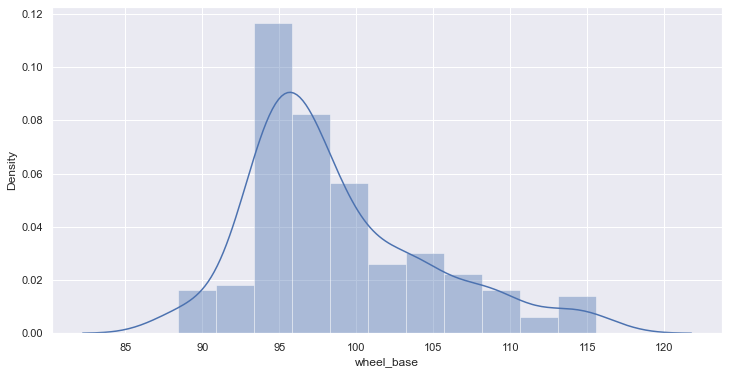

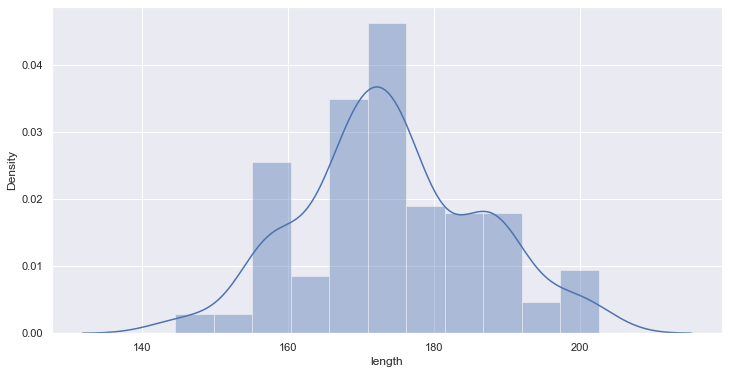

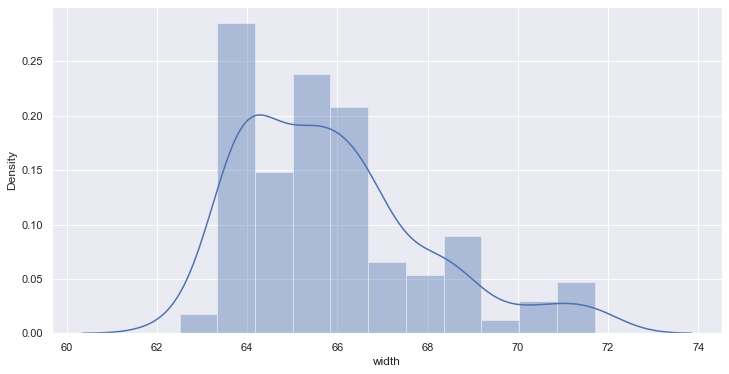

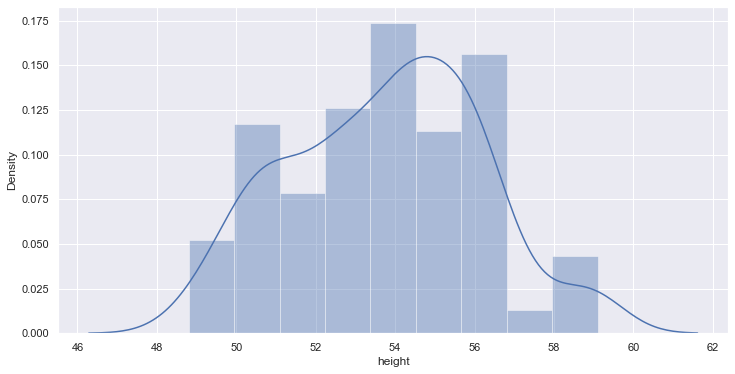

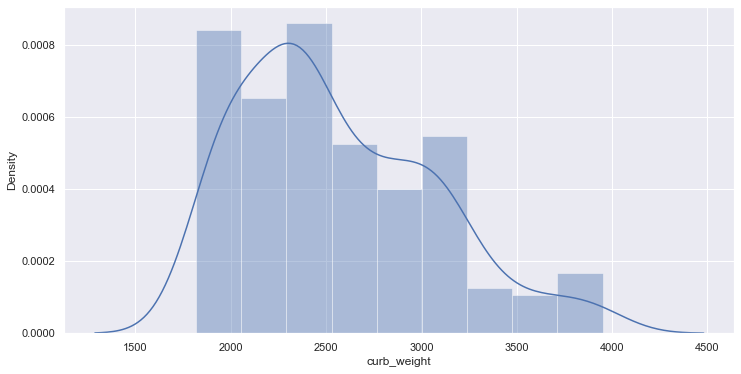

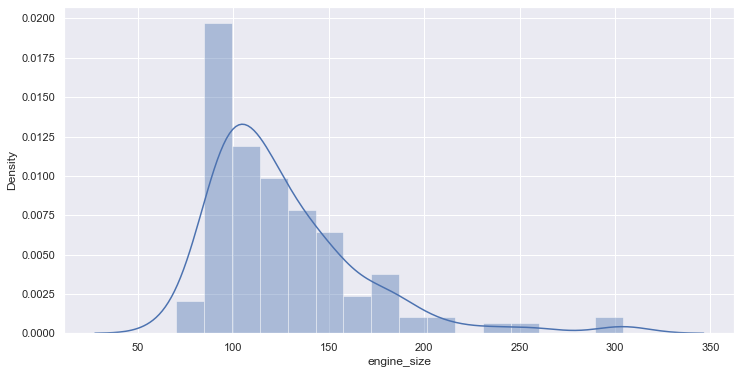

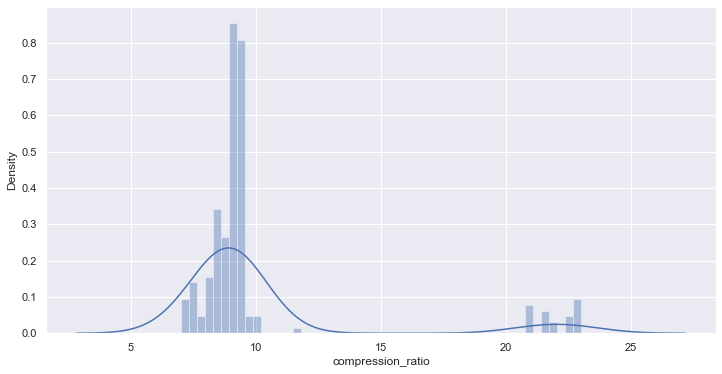

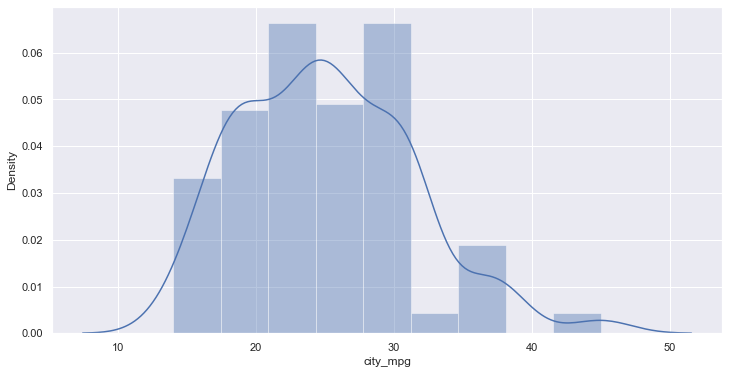

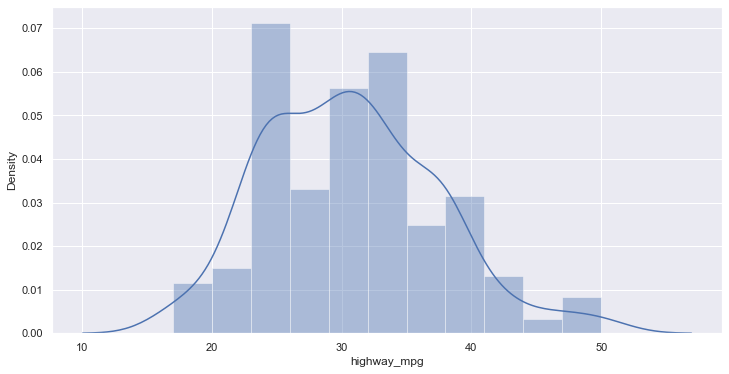

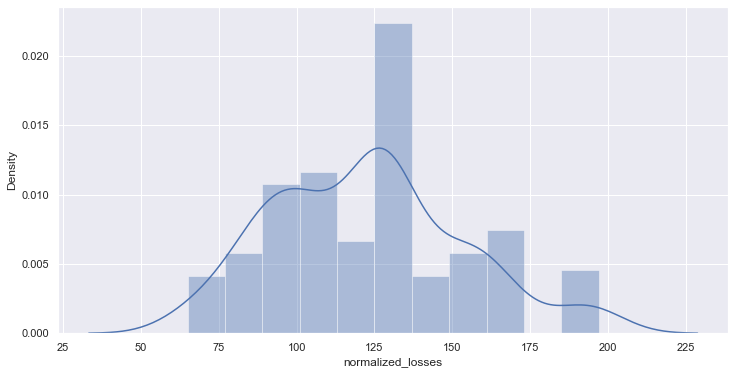

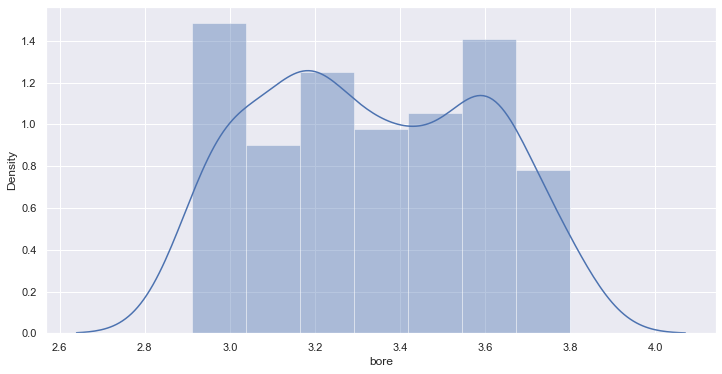

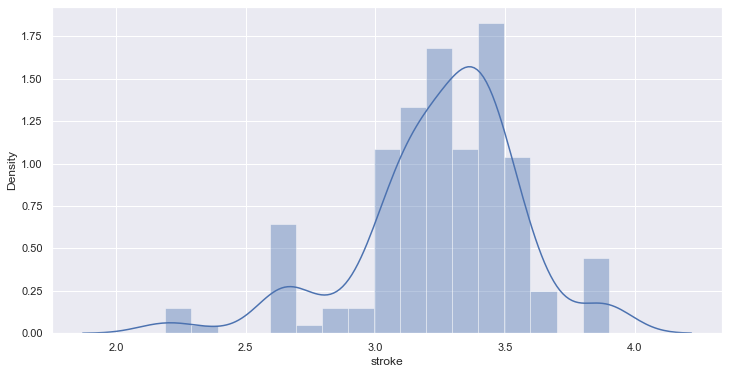

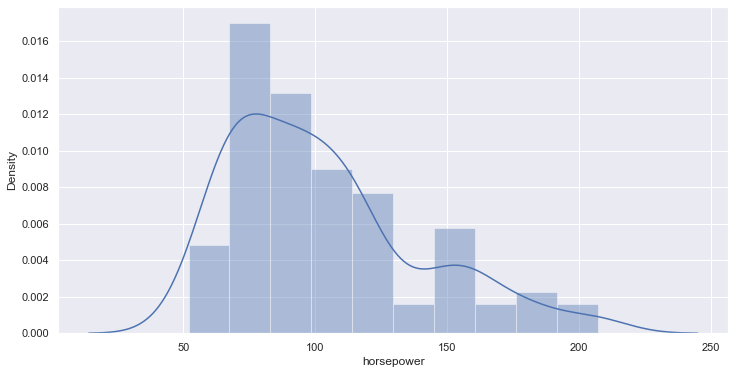

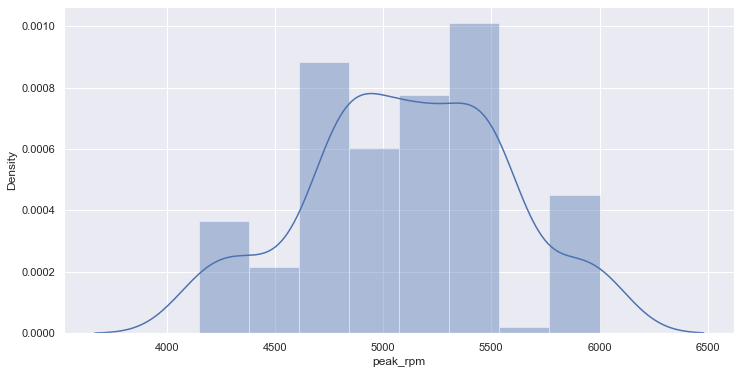

In [101]:
for col in (df_numerical.columns):
    plt.figure()
    sns.distplot(df_numerical[col])
plt.show()

For Categorical Features

In [102]:
for col in df_categorical.columns:
#     print(f"Feature {col}")
    print(df_categorical[col].value_counts())

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
gas       181
diesel     20
Name: fuel_type, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four      113
two        86
999999      2
Name: num_of_doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64
front    198
rear       3
Name: engine_location, dtype: int64
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine_type,

In [103]:
df_categorical.aspiration.replace(to_replace='999999',value=df_categorical.aspiration.mode,inplace=True)

## Correlation Analysis

In [104]:
df_numerical.corr()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm
symboling,1.000000,-0.540992,-0.366000,-0.242756,-0.553569,-0.230838,-0.109208,-0.182196,-0.041070,0.031697,0.476229,-0.138768,0.004737,0.083154,0.287381
wheel_base,-0.540992,1.000000,0.873456,0.817061,0.599307,0.779447,0.565823,0.257181,-0.464750,-0.535409,-0.036081,0.505720,0.143791,0.372218,-0.363083
length,-0.366000,0.873456,1.000000,0.854494,0.502140,0.877081,0.682596,0.162212,-0.661583,-0.692749,0.050616,0.635162,0.109724,0.580952,-0.288591
width,-0.242756,0.817061,0.854494,1.000000,0.319218,0.868736,0.731766,0.191823,-0.628473,-0.675718,0.118091,0.559130,0.177826,0.612673,-0.245960
height,-0.553569,0.599307,0.502140,0.319218,1.000000,0.319992,0.091831,0.264587,-0.052068,-0.106407,-0.373594,0.200568,-0.066867,-0.063856,-0.317847
curb_weight,-0.230838,0.779447,0.877081,0.868736,0.319992,1.000000,0.850905,0.159066,-0.745292,-0.791863,0.135257,0.667096,0.141940,0.757449,-0.284573
engine_size,-0.109208,0.565823,0.682596,0.731766,0.091831,0.850905,1.000000,0.028537,-0.654360,-0.681550,0.150627,0.596998,0.187201,0.810485,-0.258698
compression_ratio,-0.182196,0.257181,0.162212,0.191823,0.264587,0.159066,0.028537,1.000000,0.338197,0.273690,-0.112785,-0.000782,0.196982,-0.222090,-0.448042
city_mpg,-0.041070,-0.464750,-0.661583,-0.628473,-0.052068,-0.745292,-0.654360,0.338197,1.000000,0.971292,-0.261066,-0.606440,-0.027383,-0.833800,-0.121498
highway_mpg,0.031697,-0.535409,-0.692749,-0.675718,-0.106407,-0.791863,-0.681550,0.273690,0.971292,1.000000,-0.215594,-0.612917,-0.023737,-0.815425,-0.058236


In [105]:
def correlation_analysis(dataframe,threshold=(-0.75,0.75),console_output=False,inplace=False):
    """
    Multivariet Analaysis:
    
    This will keep only columns which has low correlation on specified threshold
    Console Output: True=> It print the internal process, False=> It will not print any processing
    threhold: ask the min and max threshold to retain attribure
    -1------------- -0.75---------__attrib retained__-----------0.75----------------1
    """
    if inplace:
        data = dataframe
    else:
        data = dataframe.copy()


    index = 0
    cols = data.columns.to_list()
    while cols[index] is not data[cols[-1]].name:
        new_corr = data.corr()
        mask = new_corr.loc[cols[index]].between(threshold[0],threshold[1],inclusive='both')
        removed_cols = mask[~mask].index.to_list()
        if console_output:
            print("===================================================================================================")
            print("For Feature:  ",cols[index])
            print("```````````````````````````````````````````````````````````````````````````````````````````````````")
            temp = [i for i in removed_cols]
            temp.append(cols[index])
            print(np.round(data[temp].corr(),2).convert_dtypes('str'))
#             print("===================================================================================================")

        data.drop(columns=removed_cols[1:],axis=1,inplace=True)
        cols = data.columns.to_list()
        index = index + 1
    if inplace==False:
        return data

In [106]:
# High Correlation Columns
[col for col in df_numerical.columns.to_list() if col not in correlation_analysis(dataframe=df_numerical,console_output=False).columns.to_list()]

['length', 'width', 'curb_weight', 'highway_mpg', 'horsepower']

In [107]:
df_numerical.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm
0,3,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,128.0,3.47,2.68,111.0,5000.0
1,3,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,128.0,3.47,2.68,111.0,5000.0
2,1,94.5,171.2,65.5,52.4,2823.0,152.0,9.0,19.0,26.0,128.0,2.91,3.47,154.0,5000.0
3,2,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,24.0,30.0,164.0,3.19,3.40,102.0,5500.0
4,2,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,18.0,22.0,164.0,3.19,3.40,115.0,5500.0


In [108]:
correlation_analysis(dataframe=df_numerical)

,symboling,wheel_base,height,engine_size,compression_ratio,city_mpg,normalized_losses,bore,stroke,peak_rpm
0,3,88.6,48.8,130.0,9.0,21.0,128.0,3.47,2.68,5000.0
1,3,88.6,48.8,130.0,9.0,21.0,128.0,3.47,2.68,5000.0
2,1,94.5,52.4,152.0,9.0,19.0,128.0,2.91,3.47,5000.0
3,2,99.8,54.3,109.0,10.0,24.0,164.0,3.19,3.40,5500.0
4,2,99.4,54.3,136.0,8.0,18.0,164.0,3.19,3.40,5500.0
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,55.5,141.0,9.5,23.0,95.0,3.78,3.15,5400.0
201,-1,109.1,55.5,141.0,8.7,19.0,95.0,3.78,3.15,5300.0
202,-1,109.1,55.5,173.0,8.8,18.0,95.0,3.58,2.87,5500.0
203,-1,109.1,55.5,145.0,23.0,26.0,95.0,3.01,3.40,4800.0


In [109]:
# Removing those columns
correlation_analysis(df_numerical,console_output=True,inplace=True)

For Feature:   symboling
```````````````````````````````````````````````````````````````````````````````````````````````````
           symboling  symboling
symboling          1          1
symboling          1          1
For Feature:   wheel_base
```````````````````````````````````````````````````````````````````````````````````````````````````
             wheel_base  length  width  curb_weight  wheel_base
wheel_base          1.0    0.87   0.82         0.78         1.0
length             0.87     1.0   0.85         0.88        0.87
width              0.82    0.85    1.0         0.87        0.82
curb_weight        0.78    0.88   0.87          1.0        0.78
wheel_base          1.0    0.87   0.82         0.78         1.0
For Feature:   height
```````````````````````````````````````````````````````````````````````````````````````````````````
        height  height
height       1       1
height       1       1
For Feature:   engine_size
```````````````````````````````````````````````````

## 2. Feature Engineering

### 2.1 Zero Variance Check

Negative Value Treatment

In [110]:
df_numerical.symboling = df_numerical.symboling - np.min(df_numerical.symboling)+1 # For handling Negative Value

In [111]:
df_numerical.describe()

,symboling,wheel_base,height,engine_size,compression_ratio,city_mpg,normalized_losses,bore,stroke,peak_rpm
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,3.840796,98.788557,53.764677,126.791045,10.164279,25.154229,122.641791,3.332587,3.255473,5112.437811
std,1.254802,5.946681,2.420247,40.890783,4.004965,6.312772,30.611616,0.260076,0.307168,463.081556
min,1.000000,88.400000,48.800000,70.000000,7.000000,14.000000,65.000000,2.910000,2.190000,4150.000000
25%,3.000000,94.500000,52.000000,98.000000,8.600000,19.000000,101.000000,3.150000,3.110000,4800.000000
50%,4.000000,97.000000,54.100000,120.000000,9.000000,24.000000,128.000000,3.310000,3.290000,5200.000000
75%,5.000000,102.400000,55.500000,141.000000,9.400000,30.000000,137.000000,3.580000,3.410000,5500.000000
max,6.000000,115.600000,59.100000,304.000000,23.000000,45.000000,197.000000,3.800000,3.900000,6000.000000


In [112]:
np.var(df_numerical)

symboling                 1.566694
wheel_base               35.187083
height                    5.828454
engine_size            1663.737432
compression_ratio        15.959949
city_mpg                 39.652830
normalized_losses       932.409000
bore                      0.067303
stroke                    0.093882
peak_rpm             213377.639167
dtype: float64

Here Bore and Peak has almost 0 variance, we can remove but keeping for the first use

### 1.2 Bi Variate Analysis

In [113]:
num_target_clubed = pd.concat([df_numerical,df_target],axis=1)

from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_target_clubed),index=num_target_clubed.index, columns=num_target_clubed.columns).add_suffix('_Rank')
num_binned.head()

,symboling_Rank,wheel_base_Rank,height_Rank,engine_size_Rank,compression_ratio_Rank,city_mpg_Rank,normalized_losses_Rank,bore_Rank,stroke_Rank,peak_rpm_Rank,price_Rank
0,4.0,0.0,0.0,6.0,4.0,3.0,5.0,6.0,0.0,3.0,6.0
1,4.0,0.0,0.0,6.0,4.0,3.0,5.0,6.0,0.0,3.0,7.0
2,3.0,2.0,2.0,8.0,4.0,2.0,5.0,0.0,8.0,3.0,7.0
3,4.0,6.0,5.0,4.0,7.0,4.0,8.0,4.0,7.0,6.0,6.0
4,4.0,6.0,5.0,7.0,1.0,1.0,8.0,4.0,7.0,6.0,8.0


In [114]:
df_numerical_binned = pd.concat([num_binned,df_target],axis=1)

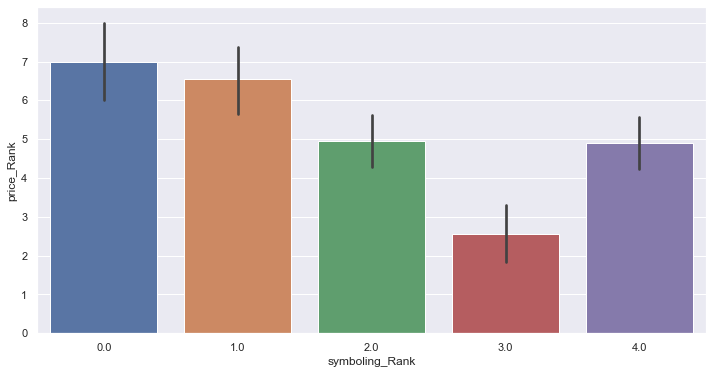

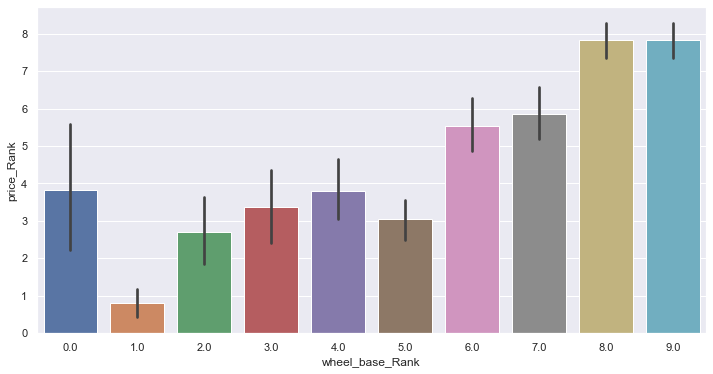

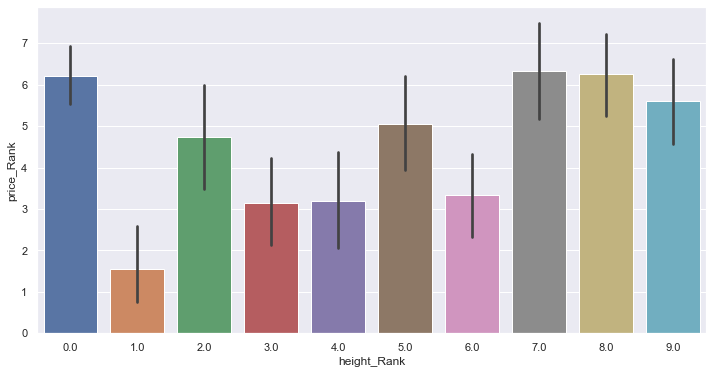

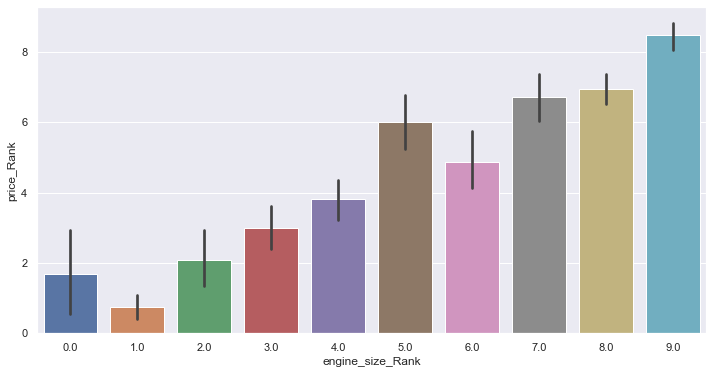

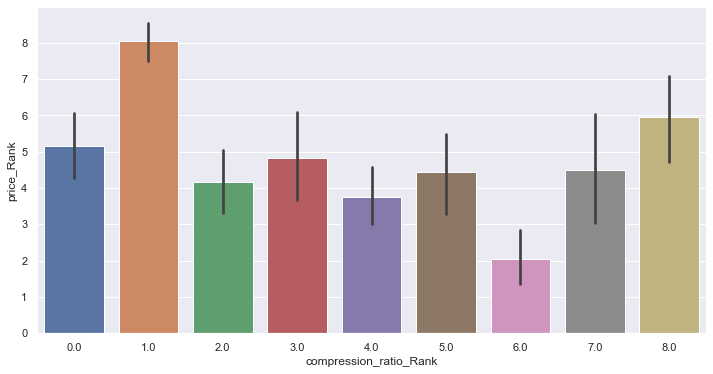

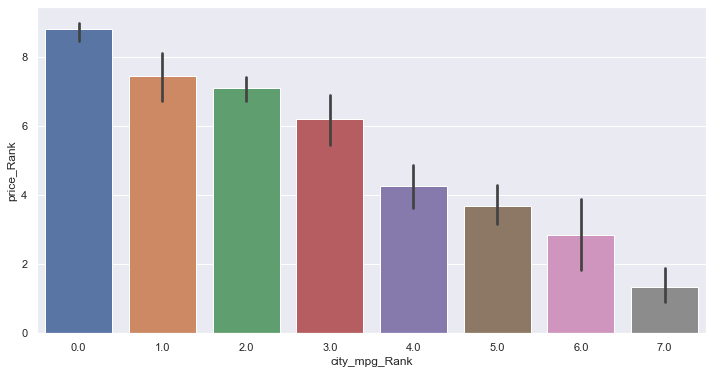

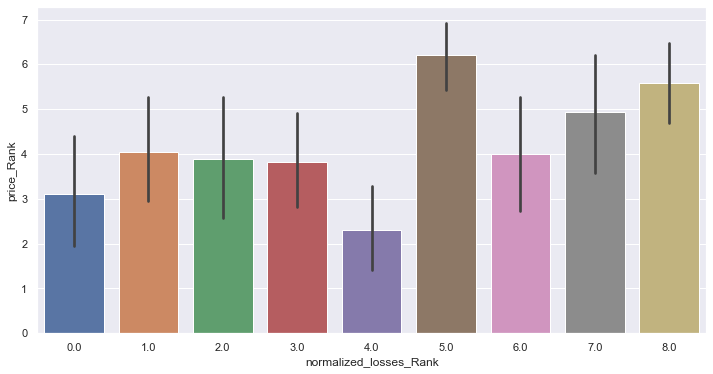

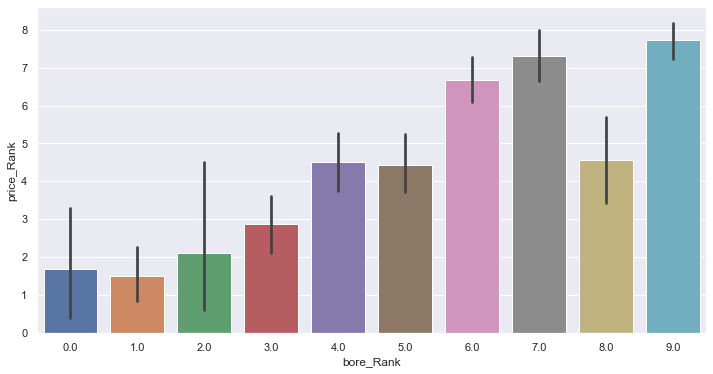

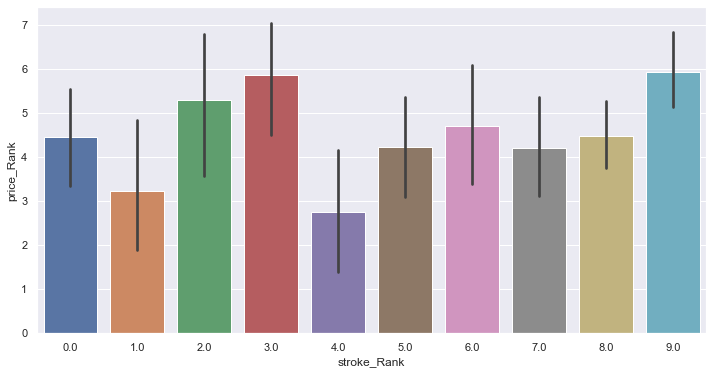

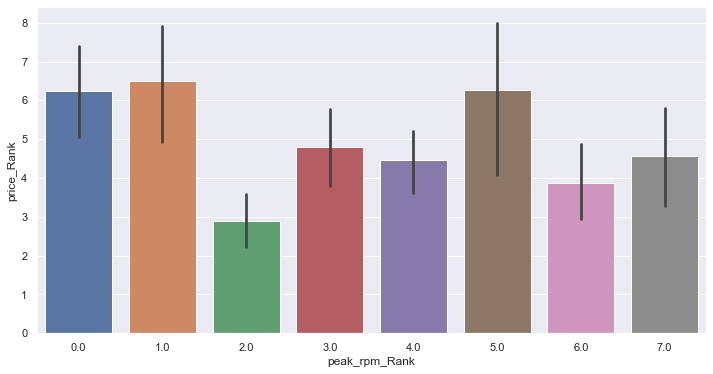

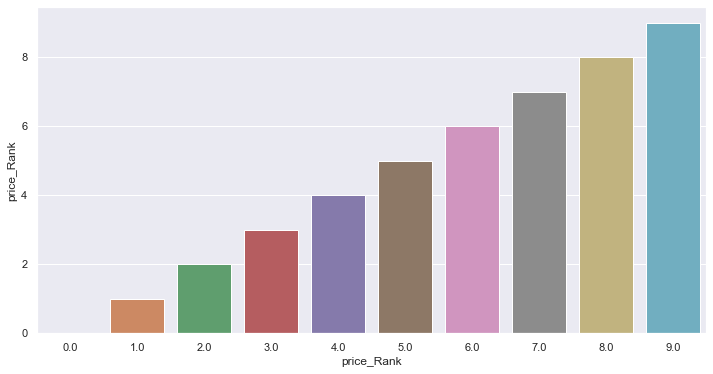

In [120]:
for col in num_binned.columns:
    plt.figure()
    sns.barplot(x=col,y='price_Rank',data=df_numerical_binned,estimator=np.mean)
#     sns.regplot(y=col,x='price_Rank',data=num_binned,marker='+',color='b')
plt.show()

In [116]:
df_categorical.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


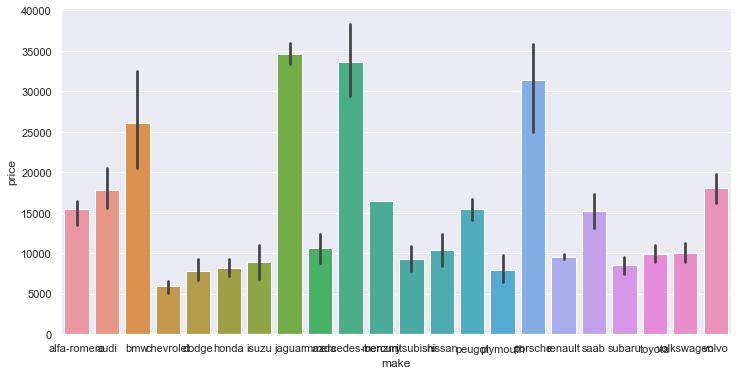

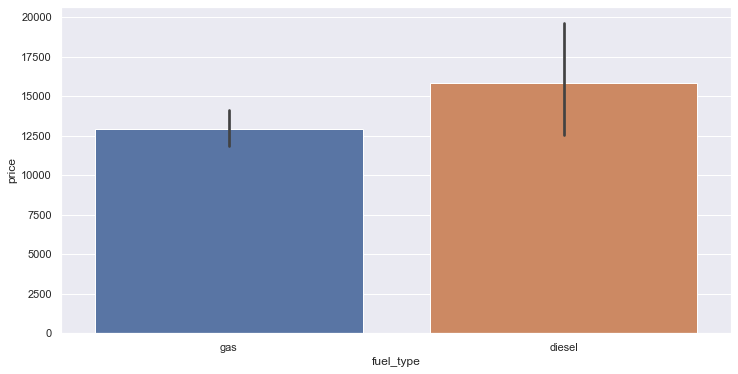

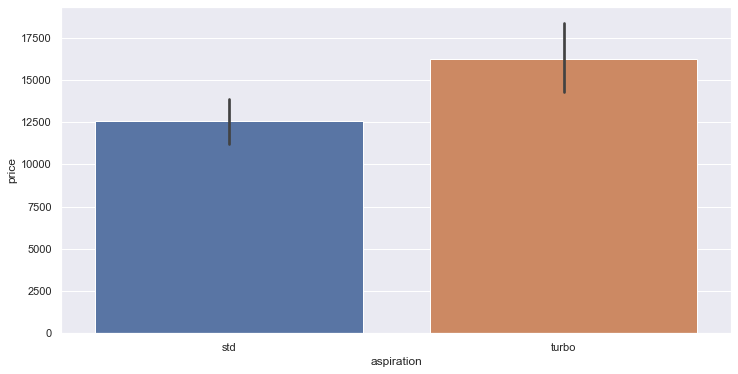

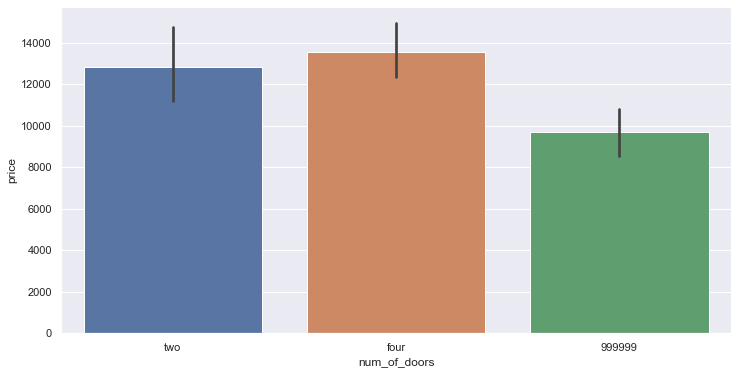

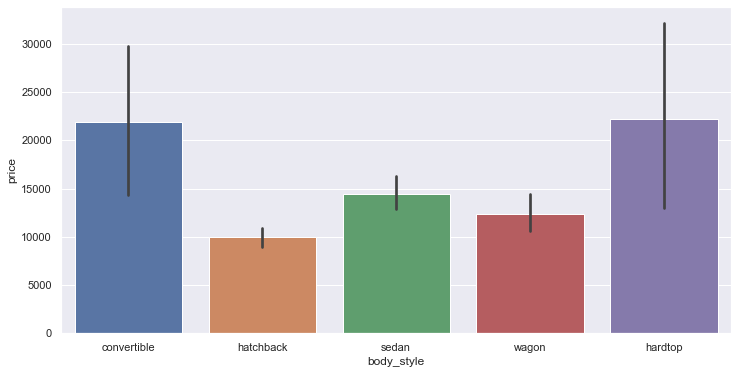

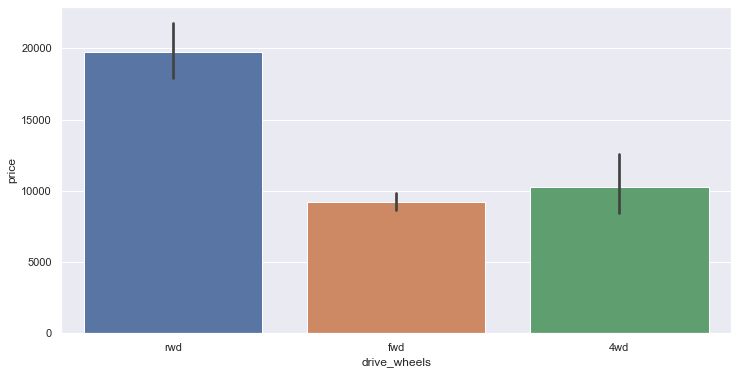

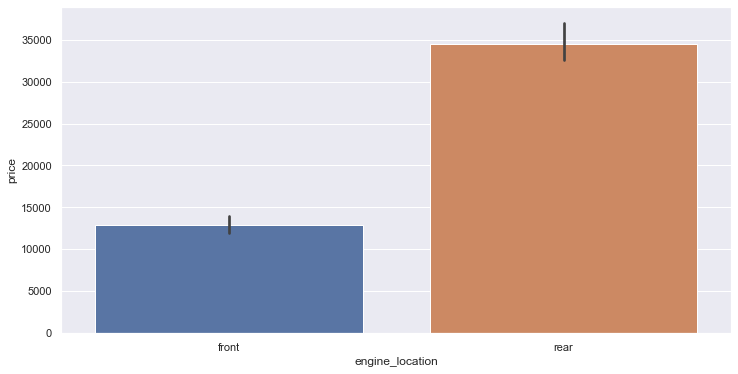

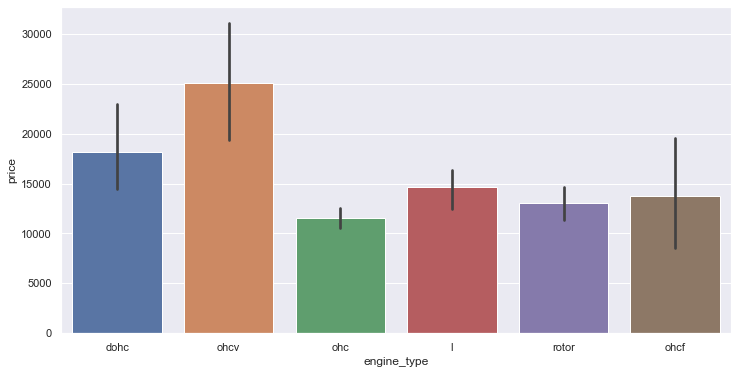

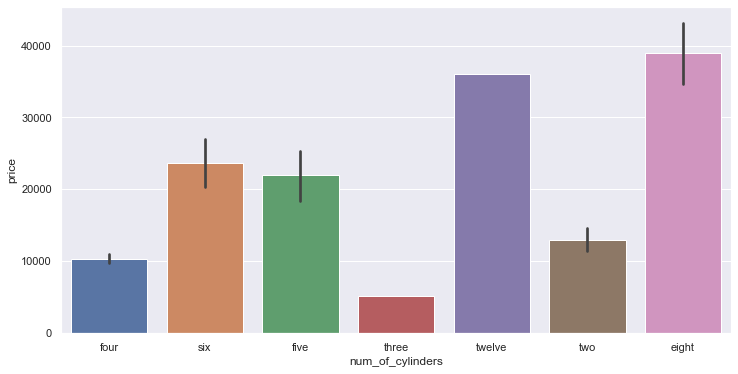

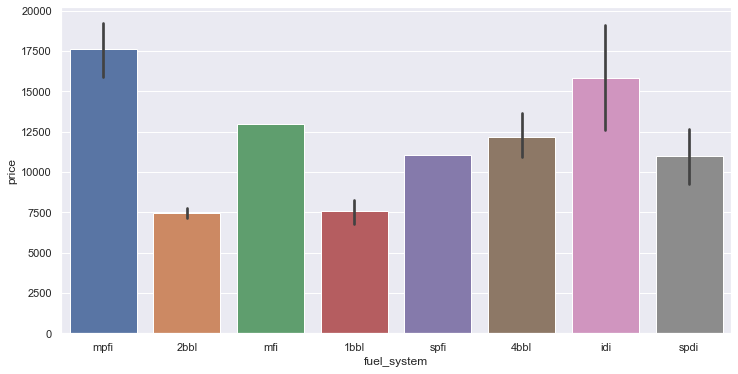

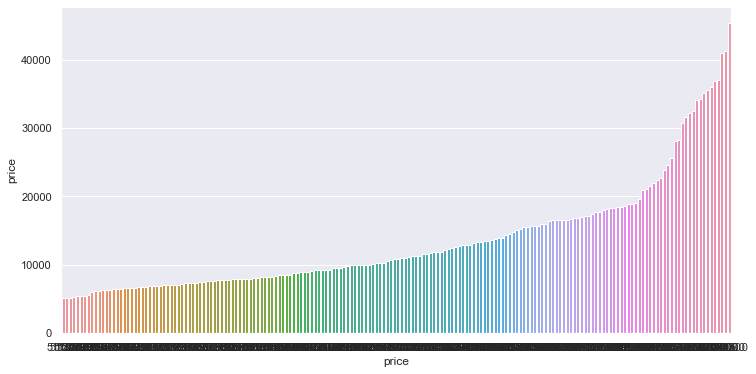

In [121]:
df_categorical_merged = pd.concat([df_categorical,df_target],axis=1)

for col in (df_categorical_merged.columns):
    plt.figure()
    sns.barplot(x=col, y="price",data=df_categorical_merged, estimator=np.mean )
plt.show()

## Feature Selection

Skipped

## One Hot Encoding

In [123]:
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first = True)
df_categorical_encoded.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_four,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Features Assemble

In [127]:
X = pd.concat([df_numerical,df_categorical_encoded],axis=1)
y = df_target

# 3. Model Building

In [129]:
# With Standerdized
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=True, random_state=37)

In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [132]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.5)
rr.fit(X_train,y_train)

Ridge(alpha=0.5)

In [133]:
from sklearn.linear_model import Lasso

lassor = Lasso(alpha=0.1)
lassor.fit(X_train,y_train)

Lasso(alpha=0.1)

In [134]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [139]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


en = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(en, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -1929.497
Config: {'alpha': 1.0, 'l1_ratio': 0.91}


In [140]:
# Train an XGBoost regressor model 
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Evaluation

In [141]:
models = [lr,rr,lassor,pipe,search,xgb_reg]

In [142]:
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
# print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))
# print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))
# print('R2:',metrics.r2_score(y_test, predictions))
# print('R2 rounded:',(metrics.r2_score(y_test, predictions)).round(2))
# r2 = r2_score(y_test, predictions)
# r2_rounded = r2_score(y_test, predictions).round(2)
# adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
# print('Adjusted_r2: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))

k = X_test.shape[1]
n = len(X_test)
response = []
for model in models:
    predictions = model.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    R2 = metrics.r2_score(y_test, predictions)
    Adj_r2 = (1- (1-R2)*(n-1)/(n-k-1)).round(3)
    
    e = {'Model':str(model),'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE,'R2':R2,'Adj_r2':Adj_r2 }
    response.append(e)
    
result = pd.DataFrame(response)

In [153]:
pd.options.display.float_format = '{:.2f}'.format

In [154]:
result

,Model,MAE,MSE,RMSE,R2,Adj_r2
0,LinearRegression(),1927.40,6947380.40,2635.79,0.88,-inf
1,Ridge(alpha=0.5),1791.61,5799798.48,2408.28,0.90,-inf
2,Lasso(alpha=0.1),1907.08,6681773.97,2584.91,0.89,-inf
3,"Pipeline(steps=[('polynomial', PolynomialFeatu...",9973944571262668.00,449801076093085163212054032547840.00,21208514235869640.00,-7548943891558011584380928.00,-inf
4,"GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_s...",1534.24,3855476.43,1963.54,0.94,-inf
5,"XGBRegressor(base_score=0.5, booster='gbtree',...",1815.63,6664125.51,2581.50,0.89,-inf


In [169]:
result.drop([3],axis=0,inplace=True)

In [149]:
result.columns[4:5]

Index(['R2'], dtype='object')

In [170]:
import plotly.graph_objects as go
model_list = ['LR','Ridge','Lasso','search','XGB']

fig = go.Figure(data=[
    go.Bar(name=result[item].name, x=model_list, y=result[item]) for item in result.columns[4:5]
])
# Change the bar mode
fig.update_layout(barmode='group',title="Different Model Metric Comparison ",height=700)
fig.show()

In [155]:
df['prediction'] = search.predict(X)

In [158]:
df['price'] = df_target

In [179]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)
models = [lr,rr,lassor,search,xgb_reg]


# Create traces

df['prediction'] = lr.predict(X)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['prediction'],
                    mode='lines',
                    name='Prediction'))
fig.add_trace(go.Scatter(x=df.index, y=df.price,
                    mode='lines+markers',
                    name='Actual'))

fig.show()

In [183]:
df['prediction'] = search.predict(X)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['prediction'],
                    mode='markers',
                    name='Prediction'))
fig.add_trace(go.Scatter(x=df.index, y=df.price,
                    mode='markers',
                    name='Actual'))

fig.show()

In [186]:
df['prediction'] = xgb_reg.predict(X)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['prediction'],
                    mode='lines',
                    name='Prediction'))
fig.add_trace(go.Scatter(x=df.index, y=df.price,
                    mode='lines',
                    name='Actual'))

fig.show()

In [187]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,prediction,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,14988.99,13495.00
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,14988.99,16500.00
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,13805.31,16500.00
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,11096.39,13950.00
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17372.43,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,188.80,68.90,55.50,2952,ohc,four,141,mpfi,3.78,3.15,9.50,114,5400,23,28,20843.44,16845.00
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,188.80,68.80,55.50,3049,ohc,four,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19590.25,19045.00
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,188.80,68.90,55.50,3012,ohcv,six,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21557.43,21485.00
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,188.80,68.90,55.50,3217,ohc,six,145,idi,3.01,3.40,23.00,106,4800,26,27,22330.03,22470.00
